# Take-home Assignment

# Part 1a: 
**Task:** Change data from 'Color_Tech_Data_dirty.xlsx' to 'Technician_Color_data.xlsx'

**Method:**
1. Convert input file from Excel to CSV format and use pandas to clean the data (to avoid downloading additional packages for pandas to process excel files)
2. Reformat data using `pandas` DataFrame

**Note**: Uncomment `#data.head()` line to see the result of each step

In [2]:
import pandas as pd
data = pd.read_csv('Color_Tech_Data_dirty.csv')

In [3]:
# First look at the data
data.head() 

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Sample 1,Unnamed: 4,Unnamed: 5,Sample 2,Unnamed: 7,Unnamed: 8,Sample 3,Unnamed: 10,Unnamed: 11
0,Individual,Oak Lot #,Day,L,C,H,L,C,H,L,C,H
1,Jen,1,D1,57.77,38.2,45.92,56.71,31.58,55.73,52.33,40.13,50.44
2,NaN,NaN,NaN,52.3,38.21,50.39,56.14,38.12,49.92,55.02,32.92,54.23
3,NaN,NaN,NaN,57.47,36.68,44.22,57.1,35.23,44.73,59.21,38.58,43.64
4,Jen,1,D2,53.35,35.81,49.57,56.16,34.41,49.65,55.52,32.09,53.1


In [4]:
# Combine L-C-H values for each sample to 3 new columns and drop the old columns
data['combined_sample1'] = data['Sample 1'] + '-' + data['Unnamed: 4']  + '-' + data['Unnamed: 5']
data['combined_sample2'] = data['Sample 2'] + '-' + data['Unnamed: 7']  + '-' + data['Unnamed: 8']
data['combined_sample3'] = data['Sample 3'] + '-' + data['Unnamed: 10']  + '-' + data['Unnamed: 11']

data.drop(data.iloc[:, 3:12], inplace=True, axis=1)
#data.head()

In [5]:
# Forward fill null values
data = data.fillna(method='ffill')

#data.head()

In [6]:
# Move first row as header and rename columns
data = data[1:]
data.columns = ['Individual', 'Oak Lot #', 'Day', '1', '2', '3']

#data.head()

In [7]:
# Rearrange samples from wide to long form
data = data.melt(id_vars=["Individual", "Oak Lot #", "Day"], 
                var_name="Sample #",
                value_name="L-C-H")
#data.head()

In [8]:
# Since the melt function rearranges the samples column-wise, just quickly sort it here so 
# the data is rearranged row-wise and matched the target format
data = data.sort_values(["Individual", "Oak Lot #", "Day", "Sample #"])

#data.head(10)

In [9]:
# Split the last column into 3
new = data['L-C-H'].str.split('-', n=2, expand=True)

#new.head()

In [10]:
# Insert new columns into data table and drop the combined 'L-C-H' column
data['L'] = new[0]
data['C'] = new[1]
data['H'] = new[2]

In [11]:
data.drop(columns='L-C-H', inplace=True)

# Final result
data.head(20)

,Individual,Oak Lot #,Day,Sample #,L,C,H
0,Jen,1,D1,1,57.77,38.2,45.92
1,Jen,1,D1,1,52.3,38.21,50.39
2,Jen,1,D1,1,57.47,36.68,44.22
54,Jen,1,D1,2,56.71,31.58,55.73
55,Jen,1,D1,2,56.14,38.12,49.92
56,Jen,1,D1,2,57.1,35.23,44.73
108,Jen,1,D1,3,52.33,40.13,50.44
109,Jen,1,D1,3,55.02,32.92,54.23
110,Jen,1,D1,3,59.21,38.58,43.64
3,Jen,1,D2,1,53.35,35.81,49.57


# Part 1b:

**Task:** Perform a basic exploratory data analysis using R or python. Please create a few tables/graphs to help explain these data. Get the averages for L, C, and H and 95% confidence intervals (around the mean) and an interval that encompasses 95% of the measured values for each variable

**Method:** Used `seaborn` and `matplotlib` packages for graphing and `numpy` and `scipy` for statistical analysis


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## Reformat Data for Graphing

In [13]:
# Read clean data
clean = pd.read_csv('Technician_Color_Data.csv')

In [14]:
# Look at the first 5 rows of dataset
clean.head(5)

,Individual,Oak Lot #,Day,Sample #,L,C,H
0,Jen,1,D1,1,57.77,38.20,45.92
1,Jen,1,D1,1,52.30,38.21,50.39
2,Jen,1,D1,1,57.47,36.68,44.22
3,Jen,1,D1,2,56.71,31.58,55.73
4,Jen,1,D1,2,56.14,38.12,49.92


In [15]:
# Quick fix: remove the space after 'Individual ' column for easier reference later
clean.rename(columns={'Individual ':'Individual'}, inplace=True)

In [16]:
# Add new column that combines lot#-sample#-day and lot#-sample# as identifier key
clean["lot-samp-day"] = clean["Oak Lot #"].astype(str) + '-' + clean["Sample #"].astype(str) + "-" + clean["Day"]

# Sort and display new table
sort_by_sample = clean.sort_values('lot-samp-day')
sort_by_sample.head()

,Individual,Oak Lot #,Day,Sample #,L,C,H,lot-samp-day
0,Jen,1,D1,1,57.77,38.20,45.92,1-1-D1
27,Mike,1,D1,1,52.92,34.99,46.08,1-1-D1
28,Mike,1,D1,1,63.57,31.55,48.25,1-1-D1
29,Mike,1,D1,1,56.46,31.23,51.31,1-1-D1
1,Jen,1,D1,1,52.30,38.21,50.39,1-1-D1


## Data Visualization

In [17]:
# take the last four columns only for graphs
LCH_only = sort_by_sample.iloc[:, 4:]

## Combine technicians' data together

In [18]:
# Summary statistics of raw data
sort_by_sample.describe().iloc[:, 2:]

,L,C,H
count,162.000000,162.000000,162.000000
mean,57.791235,35.340309,49.594691
std,3.349512,3.145910,3.528831
min,50.370000,29.220000,41.890000
25%,55.265000,32.790000,47.050000
50%,57.750000,35.230000,49.360000
75%,60.477500,38.005000,52.307500
max,67.190000,40.820000,56.610000


**Observations:** 
On average, the LCH values for this Impossible patty are 57.79, 35.34, 49.59 with standard deviations 3.35, 3.15, 3.53 respectively.

Graphs 1, 2, and 3 below are the scatterplot, lineplot, and boxplot of the raw data. The summary statistics shows that the ranges for L, C, H values don't overlap very much (the ranges are L: [50.37000 - 67.190000], C: [29.22000, 40.820000], H: [41.890000, 56.61000]). Also, `seaborn.boxplot` has an inner function that calculates outliers, so it's interesting to see that there are some outliers present in Graph 3.

Text(0.5, 0.98, 'Graph 1: Raw LCH values')

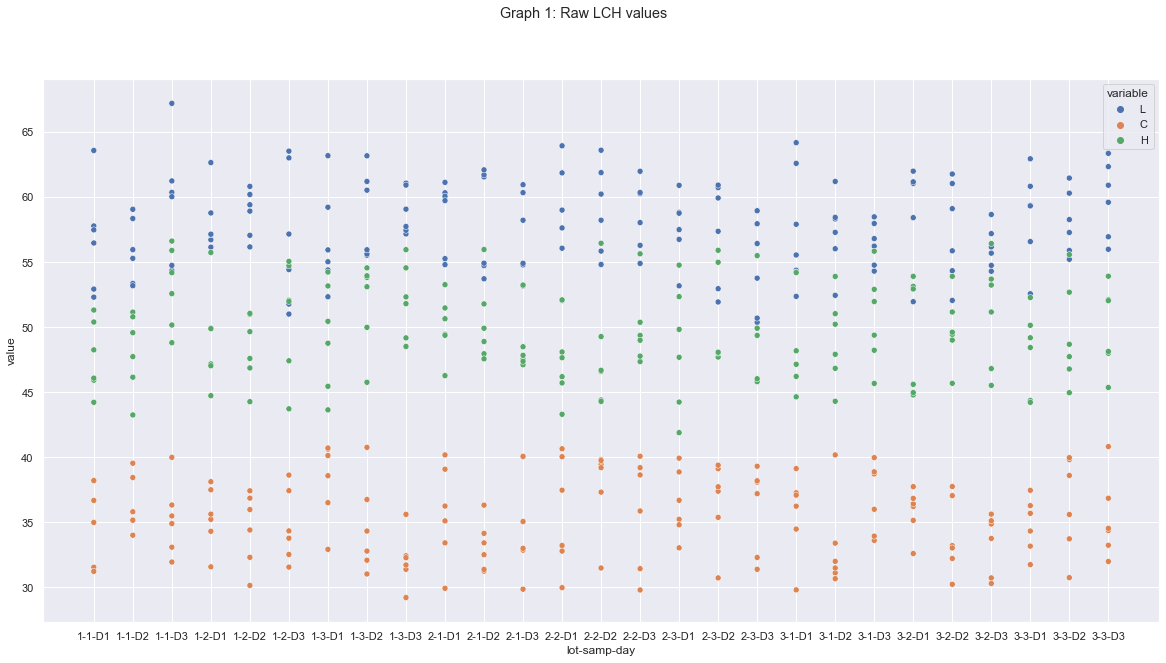

In [19]:
# First look at the raw data
figure, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x='lot-samp-day', y='value', hue='variable', data=pd.melt(LCH_only, 'lot-samp-day'), ax=ax)

figure.suptitle('Graph 1: Raw LCH values')

Text(0.5, 0.98, 'Graph 2: Sample means for each Day with CI = 95%')

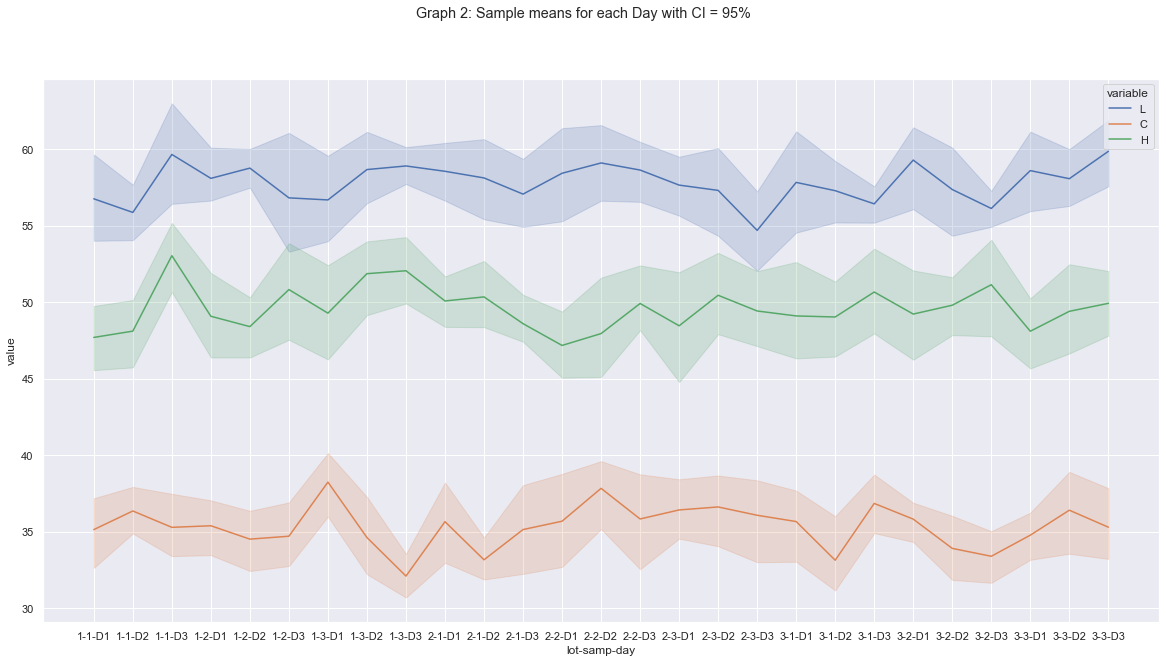

In [20]:
# Visualize sample means for each day with 95% CI
figure, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='lot-samp-day', y='value', hue='variable', ci=95, data=pd.melt(LCH_only, 'lot-samp-day'), ax=ax)

figure.suptitle('Graph 2: Sample means for each Day with CI = 95%')

Text(0.5, 0.98, 'Graph 3: LCH values for each day as quantiles')

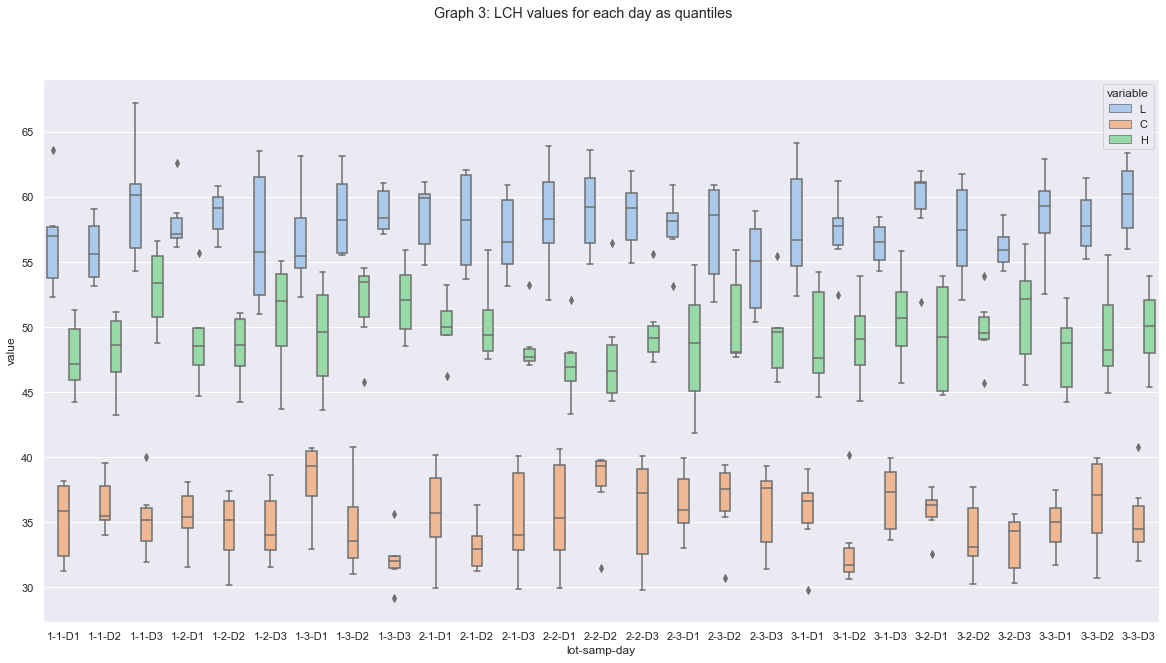

In [21]:
# Visualize raw data in boxplot
figure, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='lot-samp-day', y='value', hue='variable', data=pd.melt(LCH_only, 'lot-samp-day'), ax=ax, palette='pastel')

figure.suptitle('Graph 3: LCH values for each day as quantiles')

## Combining data for all three days together

**Observations:** For graphs 4, 5, and 6, I combined the data from all three days and graph them again like above. A curious observation in Graph 5, the lineplot is smoother and the confidence intervals are smaller (which makes sense since we have more data points). Furthermore, most of the outliers are removed in Graph 6.

In [22]:
clean["lot-samp-day"] = clean["Oak Lot #"].astype(str) + '-' + clean["Sample #"].astype(str)
clean.rename(columns={'lot-samp-day':'lot-samp'}, inplace=True)

LCH_only = clean.iloc[:, 4:]

In [23]:
LCH_only.head()

,L,C,H,lot-samp
0,57.77,38.20,45.92,1-1
1,52.30,38.21,50.39,1-1
2,57.47,36.68,44.22,1-1
3,56.71,31.58,55.73,1-2
4,56.14,38.12,49.92,1-2


Text(0.5, 0.98, 'Graph 4: Raw LCH values')

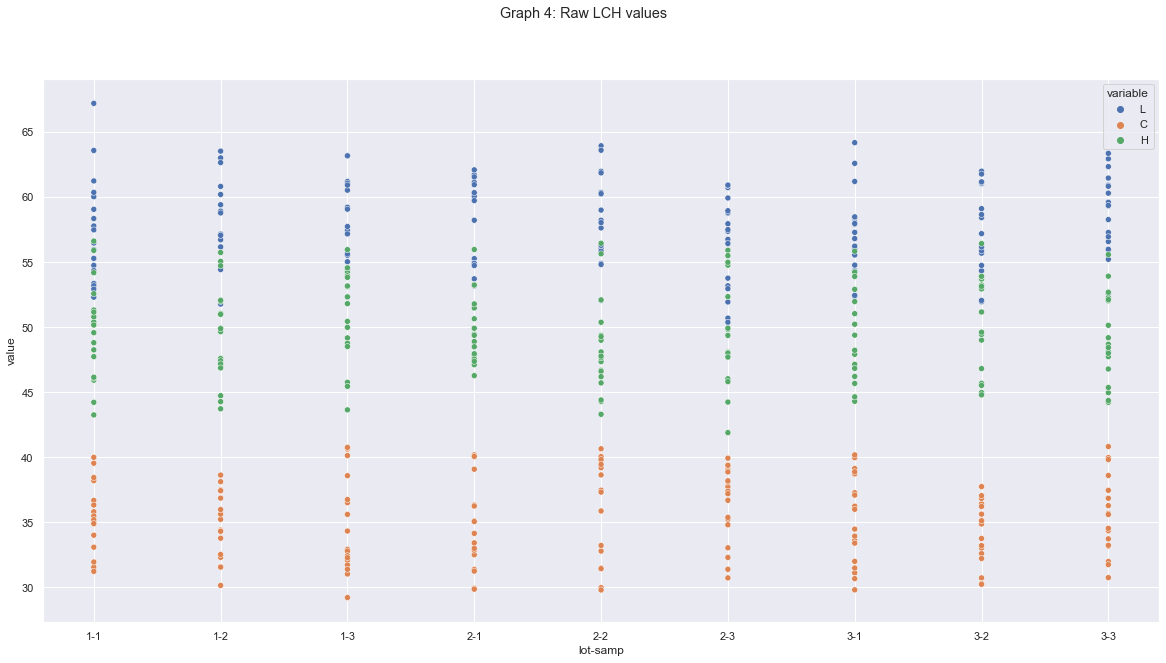

In [24]:
figure, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x='lot-samp', y='value', hue='variable', data=pd.melt(LCH_only, 'lot-samp'), ax=ax)

figure.suptitle('Graph 4: Raw LCH values')

Text(0.5, 0.98, 'Graph 5: Sample means with CI = 95%')

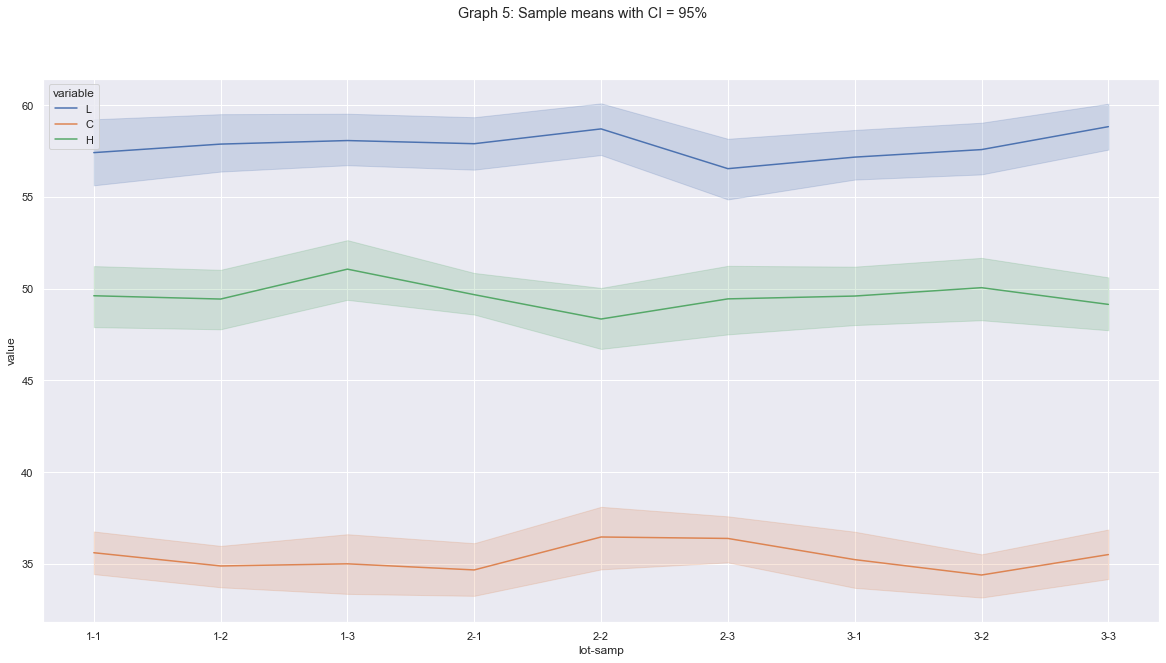

In [25]:
figure, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='lot-samp', y='value', hue='variable', ci=95, data=pd.melt(LCH_only, 'lot-samp'), ax=ax)

figure.suptitle('Graph 5: Sample means with CI = 95%')

Text(0.5, 0.98, 'Graph 6: LCH values for each sample as quantiles')

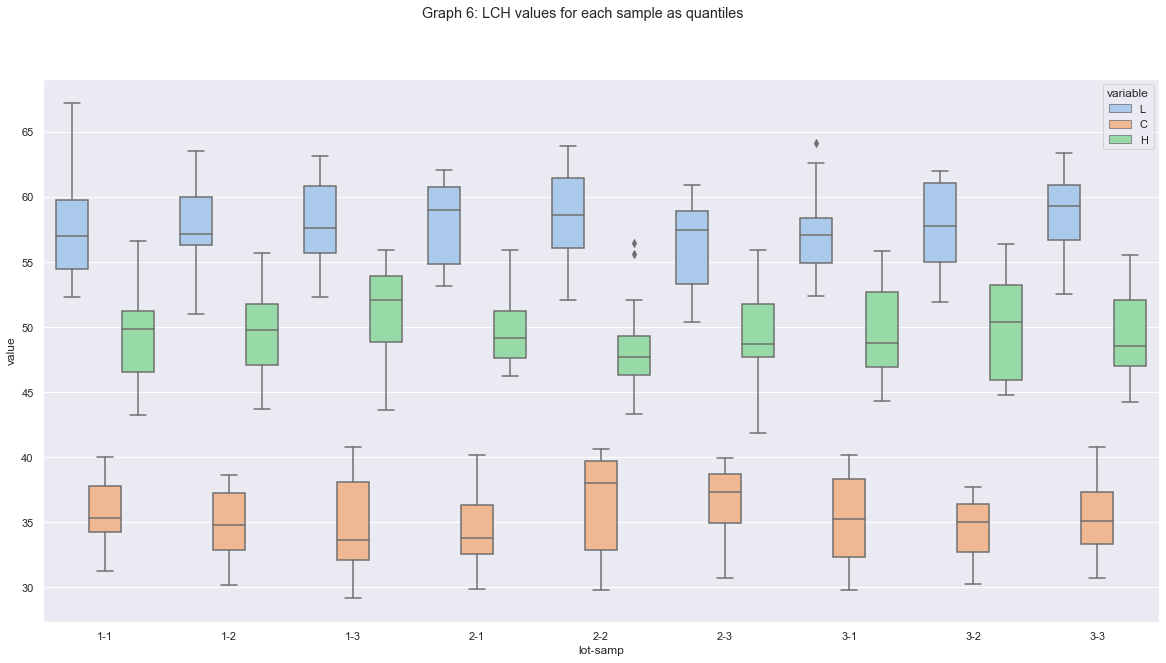

In [26]:
figure, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='lot-samp', y='value', hue='variable', data=pd.melt(LCH_only, 'lot-samp'), ax=ax, palette='pastel')

figure.suptitle('Graph 6: LCH values for each sample as quantiles')

## Find the Sample Means and Confidence Intervals

In [30]:
import numpy as np
# get the number of measurements for each sample (should equals to 18)
num_measurements_per_sample = len(clean['Oak Lot #'].unique()) * len(clean['Sample #'].unique()) * len(clean['Individual'].unique())


# find the sample_means for all 9 samples
sample_means = sort_by_sample.groupby(np.arange(len(clean))// num_measurements_per_sample ).mean()

sample_means.head(10)

,Oak Lot #,Sample #,L,C,H
0,1,1,57.417222,35.598333,49.612222
1,1,2,57.882222,34.876111,49.432222
2,1,3,58.075556,34.992778,51.062778
3,2,1,57.903889,34.660000,49.671111
4,2,2,58.711111,36.456111,48.343333
5,2,3,56.542778,36.377222,49.441667
6,3,1,57.172222,35.222222,49.596111
7,3,2,57.582778,34.382222,50.052222
8,3,3,58.833333,35.497778,49.140556


### 95% CI around the sample means

I tested the sample means for normality using the built-in `normaltest` from scipy. The result showed that I can assume the data is from a normal distribution and I can use the t-score and z-score to compute the 95% confidence interval. Both resulting CI are similar.

In [31]:
# Find 95% CI around the sample means
from scipy import stats

confidence = 0.95

In [32]:
# Test sample means for normality
# Note: there are less than 20 data points so kurtosis test might not be reliable, not going to use it anyways
k2, p = stats.normaltest(sample_means.iloc[:, 2:])

alpha = 1 - confidence
print('alpha: {}'.format(alpha))
print('p-values: L: {}, C: {}, H: {}'.format(p[0], p[1],p[2]))

alpha: 0.050000000000000044
p-values: L: 0.9769483020230273, C: 0.6945621687240466, H: 0.22290802641404794


/Users/vynguyen/ml/my_env/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Null Hypothesis: sample means come from a normal distribution

Since the p-values > alpha, we cannot reject the null hypothesis and can assume the data is from a normal distribution

In [35]:
# Find 95% confidence interval, assuming the data is from a normal distribution
n = len(sample_means)
mean, se = sample_means.iloc[:, 2:].mean(), stats.sem(sample_means.iloc[:, 2:])
tscore = stats.t.ppf((1 + confidence) / 2, df=n-1)
tmargin = tscore * se
lower_t = mean - tmargin
upper_t = mean + tmargin

zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * se
lower_z = mean - tmargin
upper_z = mean + tmargin

y_var = ['L', 'C', 'H']
print('Mean:')
print('L: {}, C: {}, H: {}'.format(mean['L'], mean['C'], mean['H']))

print('\n')
print('95% CI around the sample means using t-score')
for i in range(len(y_var)):
    print("{} : [{}, {}]".format(y_var[i], lower_t[y_var[i]], upper_t[y_var[i]]))
    
print('\n')
print('95% CI around the sample means using z-score')
for i in range(len(y_var)):
    print("{} : [{}, {}]".format(y_var[i], lower_z[y_var[i]], upper_z[y_var[i]]))

Mean:
L: 57.79123456790124, C: 35.34030864197531, H: 49.5946913580247


95% CI around the sample means using t-score
L : [57.2369993896734, 58.34546974612908]
C : [34.78717940284377, 35.893437881106856]
H : [49.038221974538, 50.1511607415114]


95% CI around the sample means using z-score
L : [57.2369993896734, 58.34546974612908]
C : [34.78717940284377, 35.893437881106856]
H : [49.038221974538, 50.1511607415114]


### 95% interval for all data

Assuming normal distribution, I used the inverse normal function to compute the interval that contains 95% of the data

In [36]:
LCH_only = LCH_only.drop(columns=['lot-samp'])
LCH_only.head()

,L,C,H
0,57.77,38.20,45.92
1,52.30,38.21,50.39
2,57.47,36.68,44.22
3,56.71,31.58,55.73
4,56.14,38.12,49.92


In [37]:
n, min_max, mean, var, skew, kurt = stats.describe(LCH_only)
std = np.sqrt(var)

upper = stats.norm.isf(q=0.05, loc=mean, scale=std) # upper 2.5%
lower = stats.norm.ppf(q=0.05, loc=mean, scale=std) # lower 2.5%

print('Intervals that contains 95% of data:')
for i in range(len(upper)):
    print('{}: mean {}, interval [{}, {}]'.format(y_var[i], mean[i], lower[i], upper[i]))

Intervals that contains 95% of data:
L: mean 57.791234567901235, interval [52.28177818518397, 63.3006909506185]
C: mean 35.34030864197531, interval [30.16574752833158, 40.514869755619046]
H: mean 49.59469135802469, interval [43.790281076827846, 55.399101639221534]


# Part 1c:

**Task:** Determine if there are significant differences for the color ratings of each L, C, and H between the two technicians. Determine if there are any other significant factors leading to differences in the measurements

## Data Visualization

### First look at data

**Observations:** From the scatterplot in Graph 7 and boxplot in Graph 10, Jens's measurements for each day are more consistent (smaller spreads) than Mike's. Also, the lineplots in Graph 8 and 9 suggest that Mike's measurements are usually higher than Jen's.

Text(0.5, 0.98, "Graph 7: Jen's and Mike's measurements")

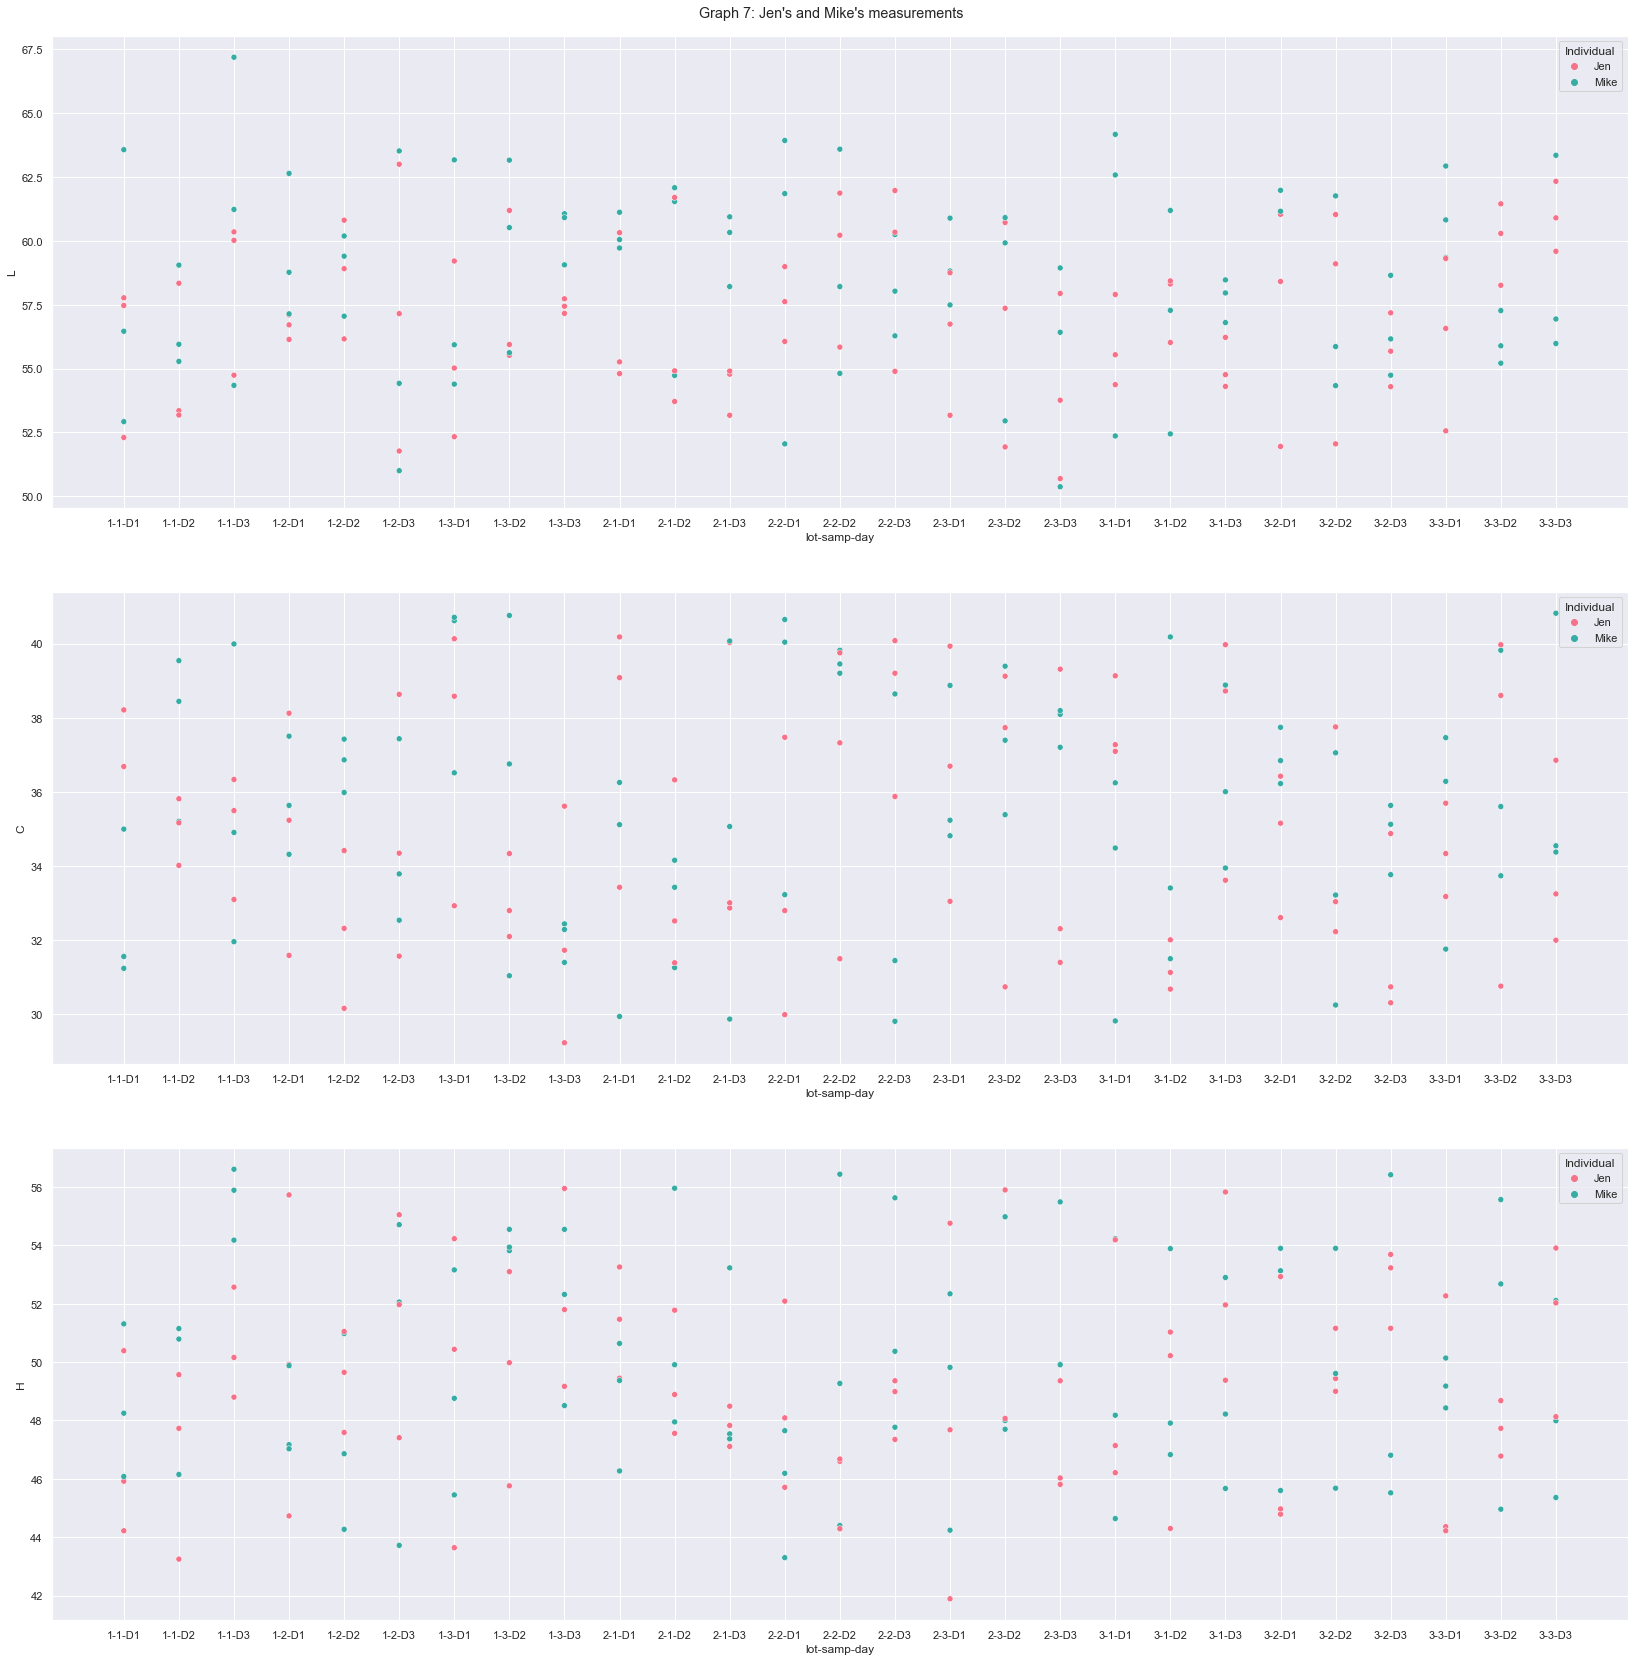

In [38]:
# Look at each technician's measurements
figure, ax = plt.subplots(3, 1, figsize=(24,24))
figure.tight_layout(pad=5.0)

for i in range(len(y_var)):
    sns.scatterplot(data=sort_by_sample, x="lot-samp-day", y=y_var[i], hue='Individual', ax=ax[i], palette='husl')
    
figure.suptitle("Graph 7: Jen's and Mike's measurements" )


Text(0.5, 0.98, "Graph 8: Jen's and Mike's average measurements with 95% interval")

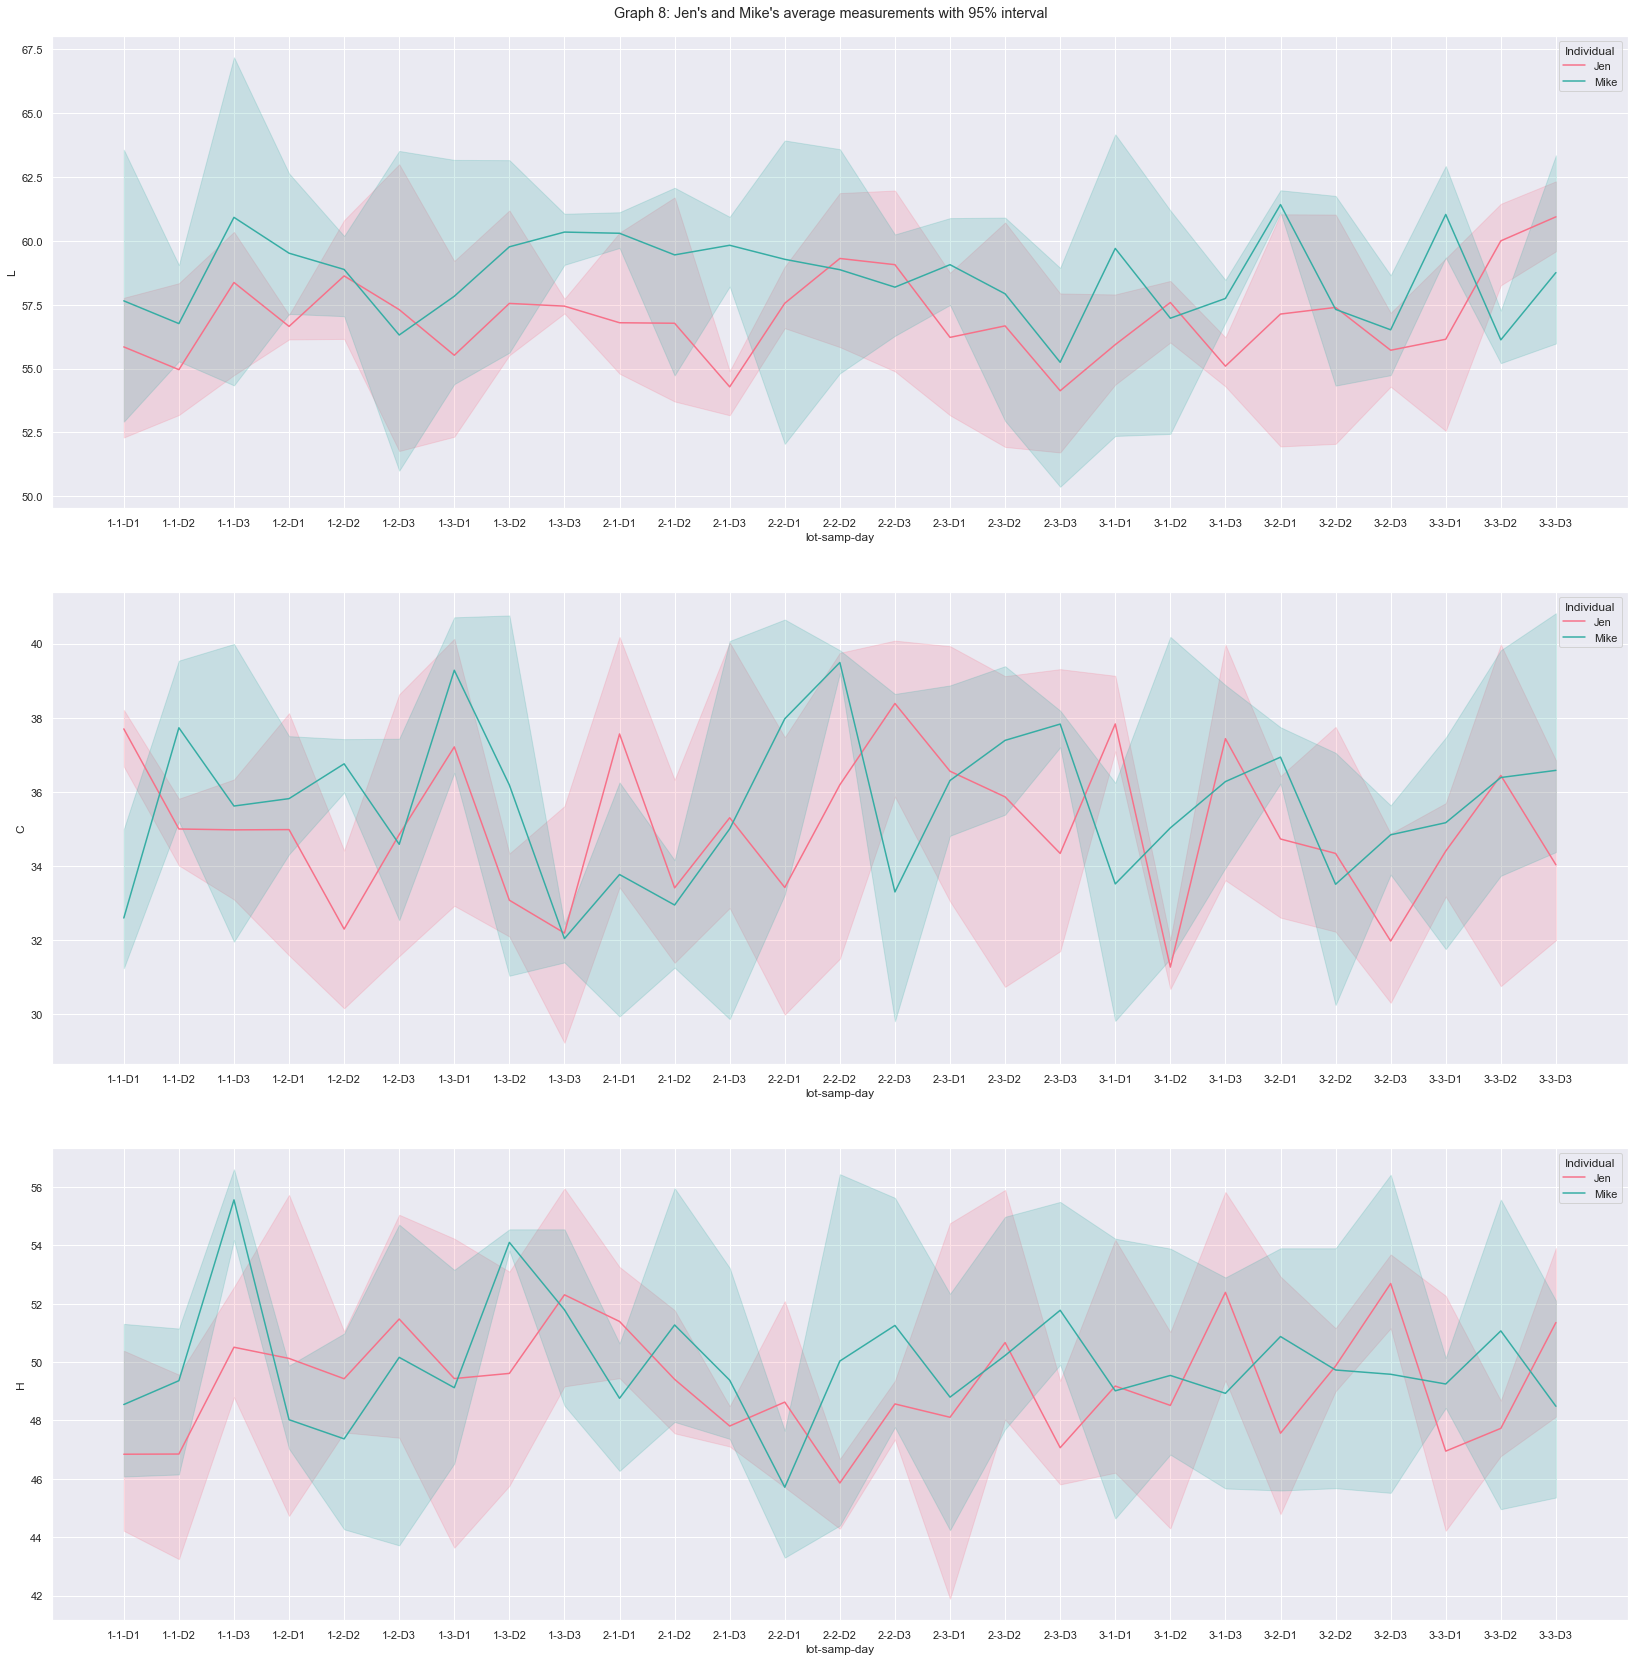

In [39]:
figure, ax = plt.subplots(3, 1, figsize=(24,24))
figure.tight_layout(pad=5.0)

for i in range(len(y_var)):
    sns.lineplot(data=sort_by_sample, x="lot-samp-day", y=y_var[i], hue='Individual', ax=ax[i], palette='husl')
    
figure.suptitle("Graph 8: Jen's and Mike's average measurements with 95% interval" )

Text(0.5, 0.98, "Graph 9: Jen's and Mike's avg measurements for each sample with 95% interval")

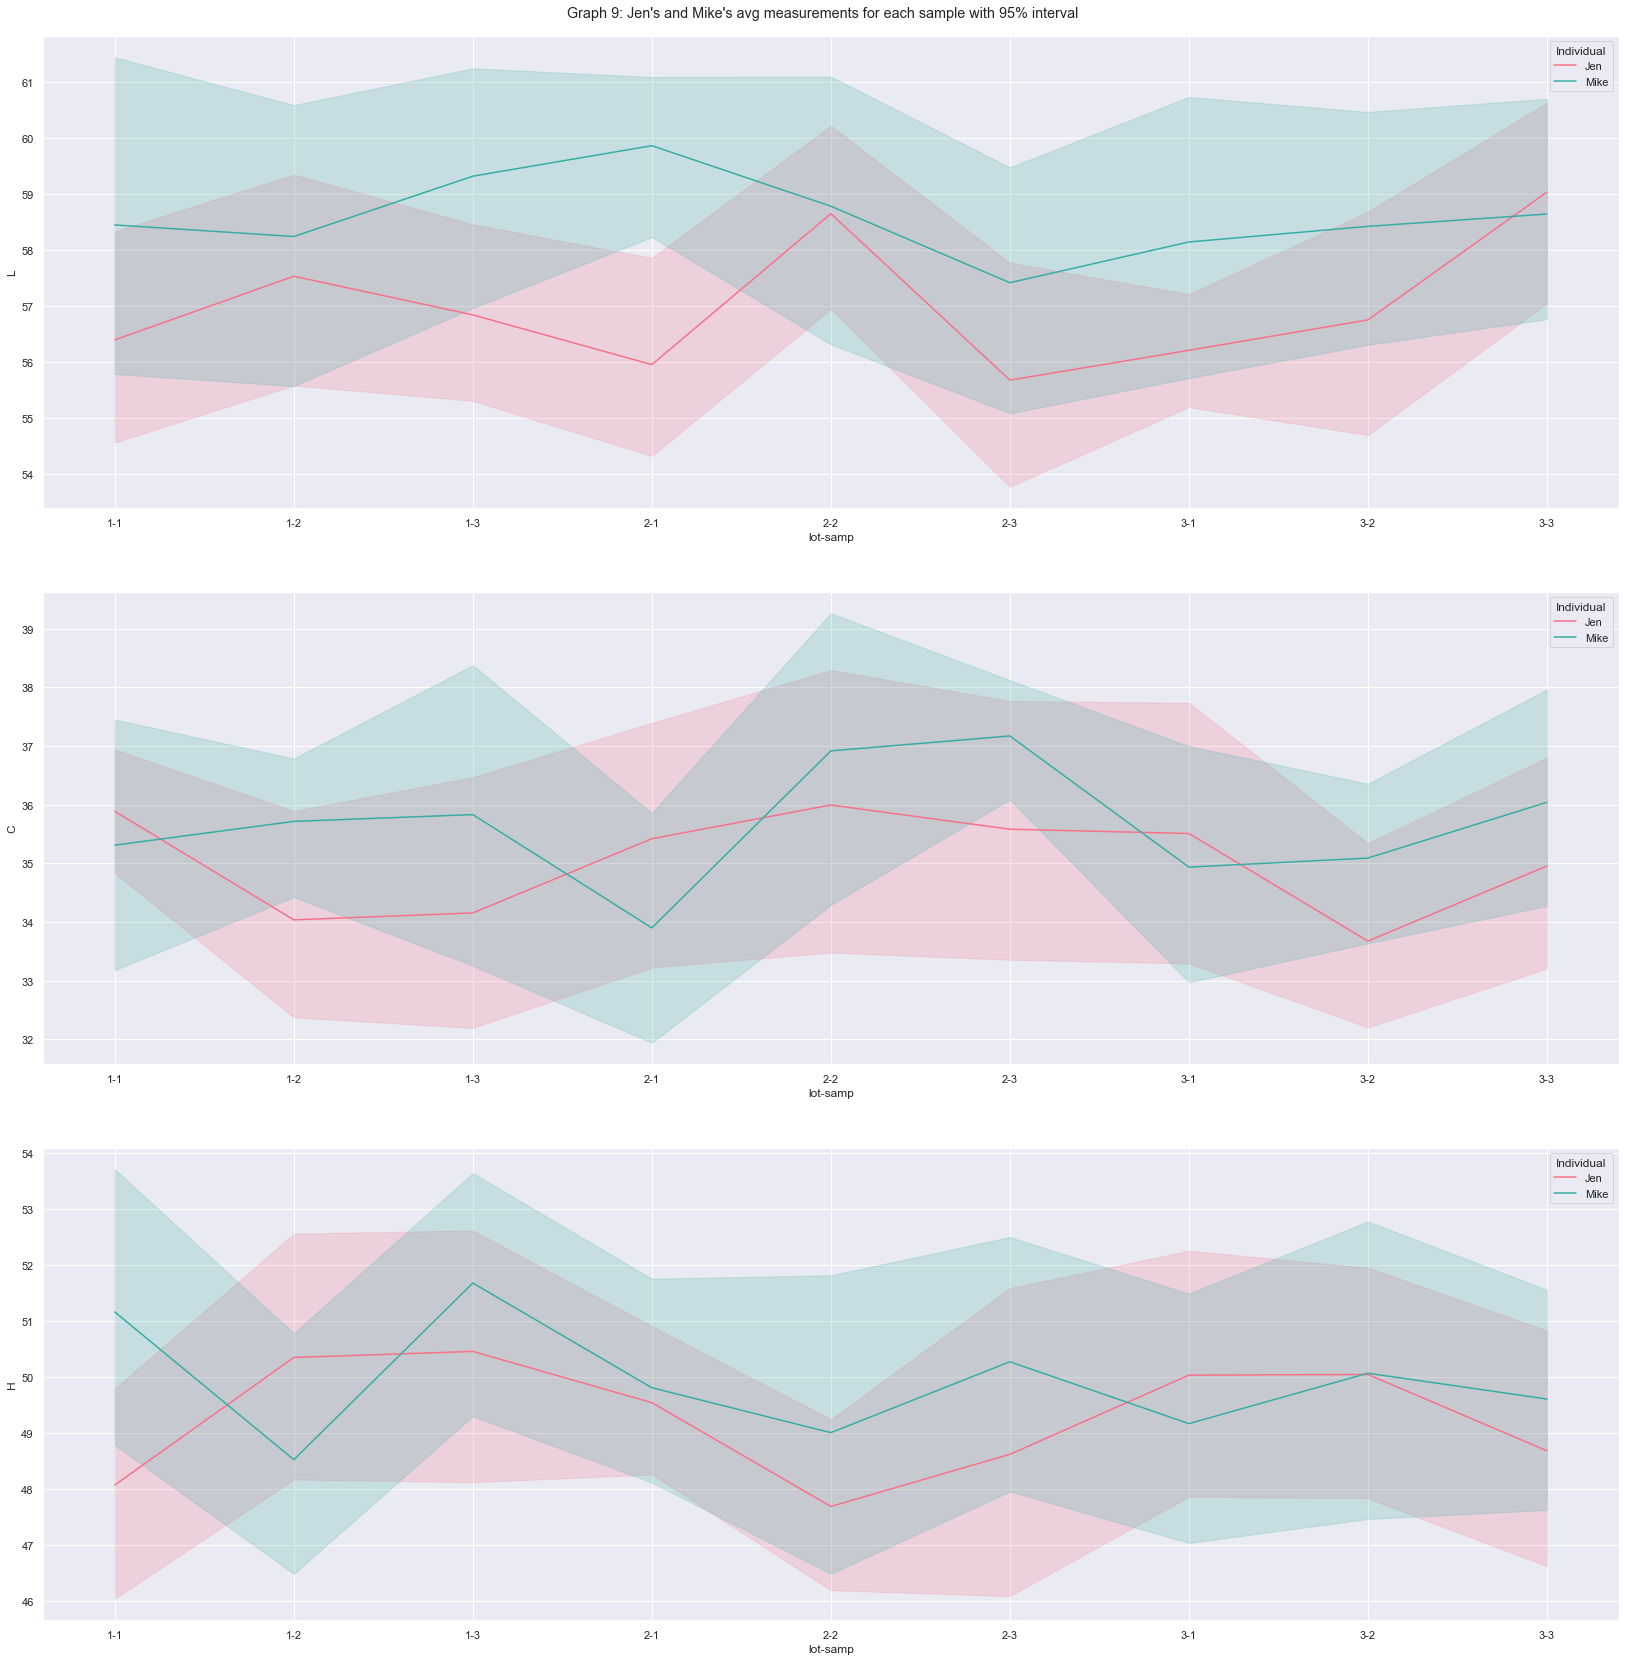

In [40]:
figure, ax = plt.subplots(3, 1, figsize=(24,24))
figure.tight_layout(pad=5.0)

for i in range(len(y_var)):
    sns.lineplot(data=clean, x="lot-samp", y=y_var[i], hue='Individual', ax=ax[i], palette='husl')
    
figure.suptitle("Graph 9: Jen's and Mike's avg measurements for each sample with 95% interval" )

Text(0.5, 0.98, "Graph 10: Jen's and Mike's measurements in quantiles")

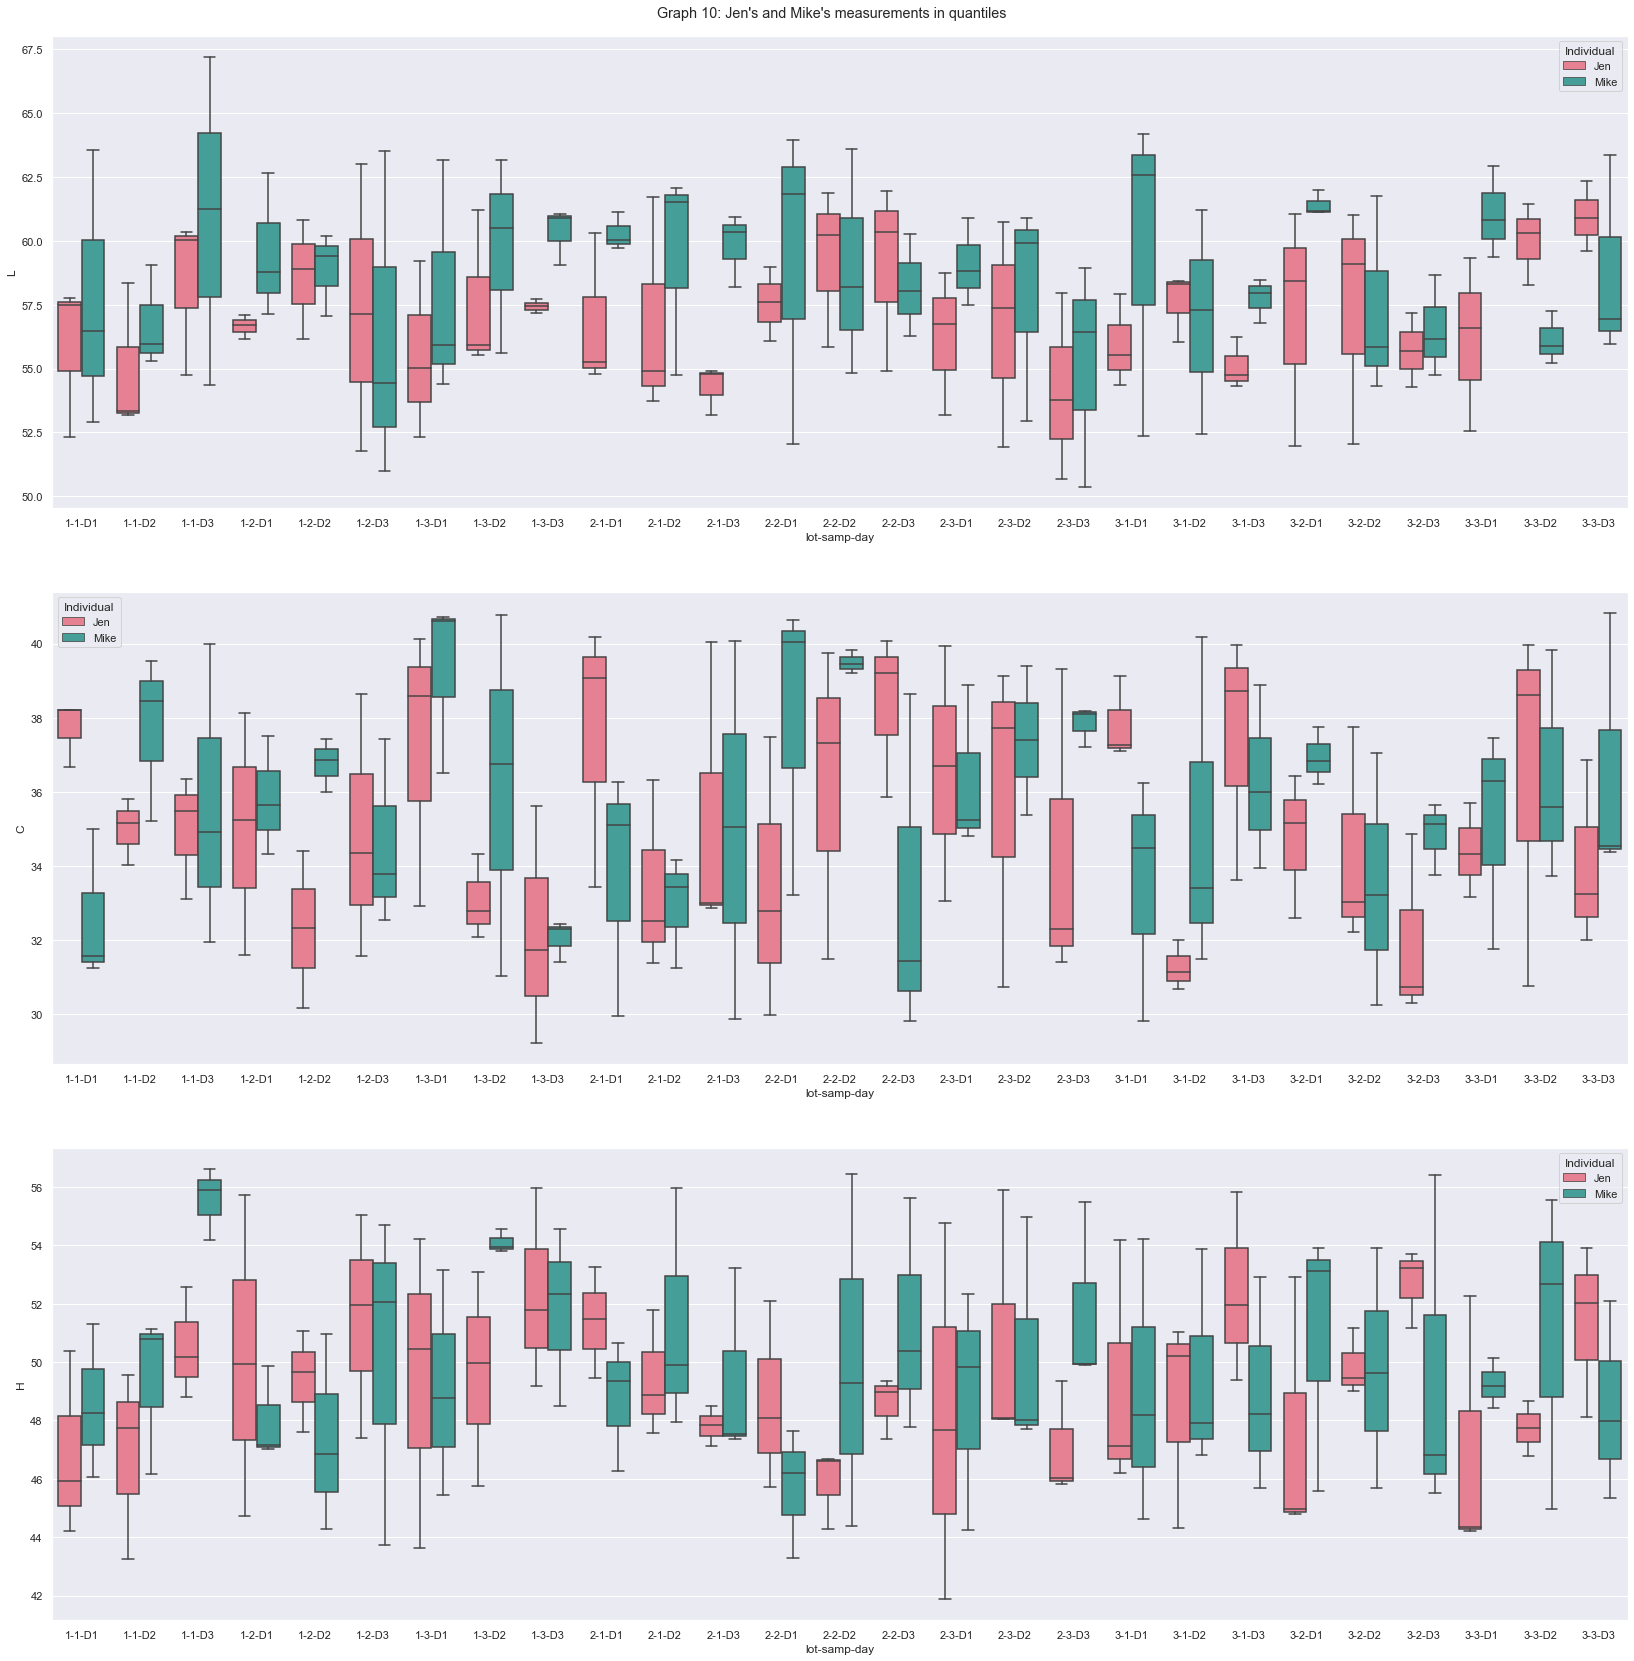

In [41]:
figure, ax = plt.subplots(3, 1, figsize=(24,24))
figure.tight_layout(pad=5.0)
y_var = ['L', 'C', 'H']
for i in range(len(y_var)):
    sns.boxplot(data=sort_by_sample, x="lot-samp-day", y=y_var[i], hue='Individual', ax=ax[i], palette='husl')
    
figure.suptitle("Graph 10: Jen's and Mike's measurements in quantiles" )

### Average the daily measurements for each technician

In [42]:
new = clean.sort_values(['Oak Lot #', 'Day', 'Sample #'])

In [43]:
#new.head()

In [44]:
# Find the mean of each technician's measurements
# rows 0,2,4... are Jen's avgs
# rows 1,3,5... are Mike's avgs

avg = new.groupby(np.arange(len(new))//3).mean()
avg['Individual'] = ['Jen', 'Mike'] * (len(new)//6)

In [45]:
avg.head()

,Oak Lot #,Sample #,L,C,H,Individual
0,1,1,55.846667,37.696667,46.843333,Jen
1,1,1,57.650000,32.590000,48.546667,Mike
2,1,2,56.650000,34.976667,50.126667,Jen
3,1,2,59.516667,35.813333,48.026667,Mike
4,1,3,55.520000,37.210000,49.436667,Jen


### Summary statistics for Jen's and Mike's averages

In [46]:
jen = avg[avg.Individual=='Jen']
jen.describe().iloc[:,2:]

,L,C,H
count,27.000000,27.000000,27.000000
mean,57.000741,35.023580,49.272346
std,1.657865,1.964395,1.891882
min,54.130000,31.263333,45.856667
25%,55.891667,33.720000,47.770000
50%,56.793333,34.970000,49.410000
75%,57.571667,36.496667,50.590000
max,60.940000,38.383333,52.693333


In [47]:
mike = avg[avg.Individual=='Mike']
mike.describe().iloc[:,2:]

,L,C,H
count,27.000000,27.000000,27.000000
mean,58.581728,35.657037,49.917037
std,1.631132,1.977969,1.964935
min,55.243333,32.033333,45.713333
25%,57.483333,34.171667,48.865000
50%,58.870000,35.813333,49.543333
75%,59.735000,36.843333,50.973333
max,61.420000,39.490000,55.560000


### 2-Sample Independent t-Test

Assuming independence and normal distribution, I used the 2-sample t-test to test the means of Jen's and Mike's data

In [48]:
t, p = stats.ttest_ind(jen.iloc[:, 2:5], mike.iloc[:, 2:5], equal_var=False)

print("t = {}  p = {}".format(t, p))

t = [-3.53221847 -1.18074105 -1.22812266]  p = [0.00087376 0.24307855 0.22493876]


Here, I used a 2-sample independent t-test to check the difference between Jen's and Mike's means.

Null hypothesis: two means are equal

Since the |T-statistics| are bigger than the p-values, we must reject the null hypothesis. This implies that the differences observed in Mike's measurements from Jen's are significant.

### Examine Mike's errors

**Observations:** On average, Mike's measurements are consistently about 2.5 - 3 points away from Jen's ([2.99, 2.87, 2.62] to be exact) with roughly equal standard deviations.

In [49]:
# Find Mike's errors from Jen's averages
errors = []
for i in range(0, len(avg) // 2, 2):
    errors.append(avg.iloc[i+1, 2:5] - avg.iloc[i, 2:5])

errors = pd.DataFrame(np.array(errors),
                    columns=['L', 'C', 'H'])
errors.head(14)

,L,C,H
0,1.803333,-5.106667,1.703333
1,2.866667,0.836667,-2.1
2,2.31,2.07,-0.313333
3,1.803333,2.733333,2.513333
4,0.253333,4.463333,-2.06
5,2.216667,3.11,4.49
6,2.55,0.643333,5.05
7,-0.993333,-0.263333,-1.313333
8,2.9,-0.15,-0.513333
9,3.503333,-3.796667,-2.633333


In [51]:
squared_errors = pd.DataFrame(pow(errors, 2))
squared_errors.describe()

,L,C,H
count,14.000000,14.000000,14.000000
unique,14.000000,14.000000,14.000000
top,0.064178,0.700011,0.098178
freq,1.000000,1.000000,1.000000


In [52]:
np.sqrt(squared_errors.mean())

L    2.261926
C    2.866061
H    2.705587
dtype: float64

In [53]:
np.sqrt(squared_errors.std())

L    1.888174
C    3.004042
H    2.829670
dtype: float64

# Part 1d:
**Task:** Write a couple paragraphs about your findings and conclusions. Please inform the team about your findings and advice for Mike’s training.

**Initial Data Visualization and Observations:**

On average, the LCH values for this Impossible patty are 57.79, 35.34, 49.59 with standard deviations 3.35, 3.15, 3.53 respectively.

Graphs 1, 2, and 3 below are the scatterplot, lineplot, and boxplot of the raw data. The summary statistics shows that the ranges for L, C, H values don't overlap very much (the ranges are L: [50.37000 - 67.190000], C: [29.22000, 40.820000], H: [41.890000, 56.61000]). Also, `seaborn.boxplot` has an inner function that calculates outliers, so it's interesting to see that there are some outliers present in Graph 3.

For graphs 4, 5, and 6, I combined the data from all three days and graph them again like above. The lineplot in Graph 5 is smoother and the confidence intervals are smaller than (which makes sense since we have more data points) than the one in graph 2. Furthermore, most of the outliers are removed in Graph 6.


**95% Confidence Interval around Sample Means:**

Since the sample means passed the normality test, I used the t-score and z-score to compute the 95% confidence interval around the sample means. Both returned the same results below

95% CI around the sample means:

L : [57.2369993896734, 58.34546974612908],

C : [34.78717940284377, 35.893437881106856],

H : [49.038221974538, 50.1511607415114]

**Range of Expected Data:**

Assumed normal distribution, I used the inverse normal function to compute the interval that contains 95% of the data. The results are

Intervals that contains 95% of data:

L: mean 57.791234567901235, interval [52.28177818518397, 63.3006909506185],

C: mean 35.34030864197531, interval [30.16574752833158, 40.514869755619046],

H: mean 49.59469135802469, interval [43.790281076827846, 55.399101639221534]

**Assessing Mike's Work:**

From the scatterplot in Graph 7 and boxplot in Graph 10, Jens's measurements for each day are more consistent (smaller spreads) than Mike's. Also, the lineplots in Graph 8 and 9 suggest that Mike's measurements are usually higher than Jen's. Assuming independence and normal distribution, I used the 2-sample t-test to test the means of Jen's and Mike's data and discovered that the errors in Mike's data are significantly different than Jen's data. In fact, on average, Mike's measurements are consistently about 2.5 - 3 points away from Jen's ([2.99, 2.87, 2.62] to be exact) with roughly equal standard deviations.

**Recommendations:**

When I analyzed the data, I noticed that there were inconsistencies in both technicians' repeated measurements taken every day. I followed up on this and learned that the measurements were taken at 3 different parts of the Impossible patties and the inhomogeneity at these sites might have contributed to the observed inconsistencies. 

As for Mike's performance, the errors in his measurements are very consistent. Since the technicians used the same instrument, it's unlikely that equipment calibration caused the differences in their measurements. Systematic errors could have occurred if Mike consistently makes the same mistake somewhere in the colorimetry measurement process. I would like to follow-up with the team to get a better understanding of the procedure before I can pinpoint where Mike's errors stemmed from. As of right now, without further understanding of how a colorimeter works, my recommendation is to focus on standardizing the sampling step, perhaps using a grid system for each lot. 

# Part 2: 
#### The color team regularly collects data as shown in 'Color_Measurements.xlsx'. They use this data for continuous monitoring of product and generate a lot of excel sheets that are identical in structure to this one. 

#### a. They want some kind of tool that can intake an excel file of this structure and output the graphs and tables (in any form you like), like the ones you created in part 1. What tools or software would you consider using and why? Preferably this tool would have a GUI of some sort where they could drag and drop their raw data and get back the tables and charts. Keep in mind that this team does not know how to program and thus would likely be unable to run jupyter notebooks or R scripts easily without some help. 

**Response:**

I would consider trying out Streamlit. Streamlit is an open-source framework that can be used to quickly build interactive web applications around data science and machine learning models. It doesn't require any knowledge about web development or front-end. We can easily add a widget that allows the scientists to upload their data, drop-down menus for visualization options, and buttons for saving the graphs/tables. Since the framework  are compatible with common data science packages, we can leverage it and power the data analysis in the back-end using tools like tensorflow, numpy, seaborn, pandas, etc.. There's also an invite-only sharing feature which might be helpful for sharing among team members. 

#### b. Now, they are asking for a database to mine their findings over the past few months. They would like all of their data compiled so they could mine it for historical findings over the past year or so. How would you help them do this? What tools would you explore? What kinds of questions would you have for the team? 

**Response:**

Based on the data in the 'Color_Measurements.xlsx' file, the data is structured and has a predefined schema so a relational database like MySQL or Postgres would be a good first choice. However, I'd like to ask the team if they anticipated that the schema will change in the future, for example, the team might decide to collect additional data later on. In that case, it's actually very expensive to redesign a schema in SQL; it involves modifying the whole database and taking it offline. So if the team requires a more dynamic schema, a NoSQL database like MongoDB or Cassandra might be a better option. We can have quick iterations over the system and make frequent updates to the data structures without a lot of downtime between versions.

Another question that I would ask is the expected size of the data and querying traffic because these relate to scalibility. In most situations, relational databases are vertically scalable, which can get very expensive. non-relational databases, on the other hand, are horizontally scalable and we can make the most out of cloud computing and storage. 

A downside of a NoSQL database is that it trades off ACID compliance for performance and scalibility. So if it is important to the team to have guarantee of the data's reliability, then a SQL database is a better choice. It is possible to have both relational and non-relational databses, depending on the team's specific use case.

#### c. Let’s imagine you’ve set up a database for them in one form or another. They would like an interactive dashboard to be able to visualize their data. If you could use any tools to help them with this, which would you reach for and why? Do you have experience with these tools?

**Response:**

There are several off-the-shelf data visualization tools like Tableau and Microsoft Power BI that would be suitable for the team's needs. These have user-friendly interface and can be used straight out of the box with minimal coding experience. However, these tools require a paid subscription to fully leverage all of their functionalities. 

Another option is to build the dashboard from scratch. Plotly Dash is another tool that can be used to create interactive dashboard in python, in conjunction with CSS and Flask. I haven't had a chance to use Plotly Dash before but I have experience with python and CSS and I just recently finished a course on deploying apps using Flask.